F:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


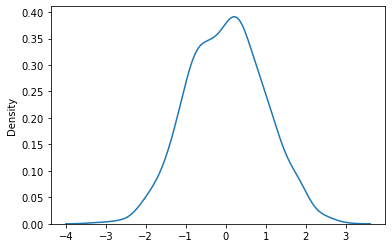

In [1]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000)
sns.distplot(random_array, hist=False)

plt.show() 

In [2]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [3]:
series

0     -1.060689
1      0.498328
2      0.443664
3      0.341118
4      0.248428
         ...   
995   -1.250696
996   -0.844160
997   -1.138328
998    0.556670
999    1.011201
Length: 1000, dtype: float64

In [4]:
series.describe() # Описательная статистика

count    1000.000000
mean        0.011740
std         0.959727
min        -3.277260
25%        -0.688987
50%         0.033843
75%         0.669105
max         2.890807
dtype: float64

In [5]:
series.quantile(0.23) # 23-й перцентиль

-0.7456315448322896

In [6]:
np.percentile(series, 23) # 23-й перцентиль (numpy)

-0.7456315448322896

In [7]:
# Функция расчета среднего значения в series
def get_mean(series):
    sum_series = 0
    series_notna = series[series.notna()]
    for row in series_notna.values:
        sum_series += row
    return sum_series/len(series_notna)

In [8]:
# Расчет среднего значения в series
mean_series = get_mean(series)
mean_series

0.011740133600581144

In [9]:
# Проверка расчета среднего значения
print(series.mean())
series.mean() == mean_series

0.011740133600581144


True

In [10]:
# Функция расчета персентиля в series
# По умолчанию, параметр interpolation в Series.quantile() - "linear: i + (j - i) * fraction, where fraction is the 
# fractional part of the index surrounded by i and j."
def get_quantile(series, fraction):
    series_notna = series[series.notna()]
    sort_series = sorted(series_notna)
    idx = fraction*(len(sort_series) - 1) + 1
    i = sort_series[int(idx) - 1]
    j = sort_series[int(idx)]
    num = i + (j - i)*(idx%1)
    return num

In [11]:
# Расчет медианы в series
median_series = get_quantile(series, 0.5)
median_series

0.03384313156071525

In [12]:
# Проверка расчета медианы
print(series.median())
series.median() == median_series

0.03384313156071525


True

In [13]:
# Расчет межквартильного размаха в series
irange = get_quantile(series, 0.75) - get_quantile(series, 0.25)
irange

1.3580922958160442

In [14]:
# Проверка расчета межквартильного размаха
interquartile_range = series.quantile(0.75) - series.quantile(0.25)
interquartile_range_np = np.percentile(series, 75) - np.percentile(series, 25)
print(interquartile_range)
print(interquartile_range_np)
interquartile_range == irange

1.3580922958160442
1.3580922958160442


True

In [15]:
# Расчет 23-й перцентиль в series
quantile_23 = get_quantile(series, 0.23)
quantile_23

-0.7456315448322896

In [16]:
# Проверка расчета 23-й перцентиль
print(series.quantile(0.23))
series.quantile(0.23) == quantile_23

-0.7456315448322896


True

In [17]:
# Функция расчета стандартного отклонения в series
def get_std(series):
    sum_dist = 0
    mean_ser = get_mean(series)
    series_notna = series[series.notna()]
    for row in series_notna.values:
        sum_dist += (row - mean_ser)**2
    variance_series = sum_dist/(len(series_notna) - 1)
    return variance_series**(1/2)

In [18]:
# Расчет стандартного отклонения в series
std_series = get_std(series)
std_series

0.9597271930257208

In [19]:
# Проверка расчета стандартного отклонения
print(series.std())
series.std() == std_series

0.9597271930257208


True